This notebook aims to reproduce Figure 4 (a)(b). (c)(d) can be found in add_tutorial.ipynb.

Note Figure 4 (a) does not require any training, and depends solely on the training set. So we can set steps and eff_steps to 1 to reduce running time. (there's a bug if you set them to 0)

In [18]:
from ipynb.fs.full.train_add import train_add

In [19]:
dic = train_add(steps=1, eff_steps=1, loss_type="MSE", train_num=45)

Using device: cpu
train_num=45
seed=58
steps=1
----------------------------------------
Task 1: Analyzing the dataset before training...
acc_ideal_test = 10/10=1.0
the degree of freedom (except translation/scaling) for the reprsentation is 0
dof=0 means the linear repr is the unique repr, while dof>0 means existence of other reprs
----------------------------------------
Task 2: Training with neural network...
step: 0  | loss: 0.98126626 
final train acc=0.0444, test acc=0.2000, RQI=0.0143
Steps to reach thresholds: train acc=0, test acc=0, RQI=0
----------------------------------------
Task 3: Training with effective loss...
step: 0  | loss: 397.76652391 
saving trajectories...


we care about the degree of freedom of the representation. A linear representation (1D) have at most two dofs: translation and scaling. So dof > 2 means the linear representation is not unique

In [20]:
dic["dof"]

2

Now we reproduce Figure 4 (a). If you want to get a smoother curve, use a larger seeds or finer train_nums. seeds=100 should take 1-2 minutes on a single CPU.

In [4]:
import numpy as np
import sys
import os

train_nums = np.arange(1,19)*3
seeds = 100
probs = []


class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

for train_num in train_nums:
    print("train_num={}".format(train_num))
    success_count = 0
    for seed in np.arange(seeds):
        with HiddenPrints():
            dic = train_add(train_num=train_num, seed=seed, steps=1, eff_steps=1)
        success_count += (dic["dof"]==2)
    prob = success_count/seeds
    probs.append(prob)

train_num=3
train_num=6
train_num=9
train_num=12
train_num=15
train_num=18
train_num=21
train_num=24
train_num=27
train_num=30
train_num=33
train_num=36
train_num=39
train_num=42
train_num=45
train_num=48
train_num=51
train_num=54


Text(0.5, 1.0, 'Figure 4 (a)')

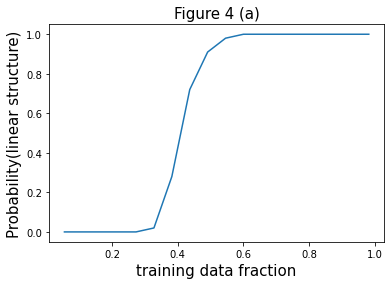

In [9]:
import matplotlib.pyplot as plt

fontsize = 15
# Figure 4(a)
plt.plot(train_nums/dic["all_num"], probs)
plt.xlabel("training data fraction", fontsize=fontsize)
plt.ylabel("Probability(linear structure)", fontsize=fontsize)
plt.title("Figure 4 (a)", fontsize=fontsize)

Now we reproduce Figure 4 (b). If you want to get a smoother curve, use a larger seeds or finer train_nums. seeds=100 should take 5 minutes on personal laptop (~8 CPUs).

In [3]:
import numpy as np
from multiprocess import Pool
import os
import sys


path = "./results/fig4/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

def train_many(params):
    train_num = int(params[0])
    seed = int(params[1])
    print("train_num={}, seed={}".format(train_num, seed))
    with HiddenPrints():
        dic = train_add(train_num=train_num, seed=seed, steps=int(1e4), eff_steps=1)
        np.savetxt(path+"rqistep_num_%d_seed_%d.txt"%(train_num, seed), np.array([dic["iter_rqi"]]))

train_nums = [5,10,15,20,25,30,35,40,45,50,54]
seeds = [0,1,2]

xx, yy = np.meshgrid(train_nums, seeds)
params = list(np.transpose(np.array([xx.reshape(-1,), yy.reshape(-1,)])))


if __name__ == '__main__':
    with Pool(11) as p:
        p.map(train_many, params)

train_num=5, seed=0train_num=15, seed=0train_num=10, seed=0train_num=25, seed=0train_num=20, seed=0train_num=30, seed=0train_num=35, seed=0train_num=40, seed=0train_num=45, seed=0train_num=50, seed=0




train_num=54, seed=0





train_num=5, seed=1
train_num=10, seed=1
train_num=15, seed=1
train_num=20, seed=1
train_num=25, seed=1
train_num=30, seed=1
train_num=35, seed=1
train_num=40, seed=1
train_num=45, seed=1
train_num=50, seed=1
train_num=54, seed=1
train_num=5, seed=2
train_num=10, seed=2
train_num=15, seed=2
train_num=20, seed=2
train_num=25, seed=2
train_num=30, seed=2
train_num=35, seed=2
train_num=40, seed=2
train_num=45, seed=2
train_num=50, seed=2
train_num=54, seed=2


In [11]:
import numpy as np

path = "./results/fig4/"
train_nums = [5,10,15,20,25,30,35,40,45,50,54]
seeds = [0,1,2]

def load_data(train_num, seed):
    rqistep = np.loadtxt(path+"rqistep_num_%d_seed_%d.txt"%(train_num, seed))
    return rqistep, train_num

rqisteps = []
train_nums_ = []
for train_num in train_nums:
    for seed in seeds:
        rqistep, train_num = load_data(train_num, seed)
        rqisteps.append(rqistep)
        train_nums_.append(train_num)
        

The points are above the line


Text(0.5, 1.0, 'Figure 4 (b)')

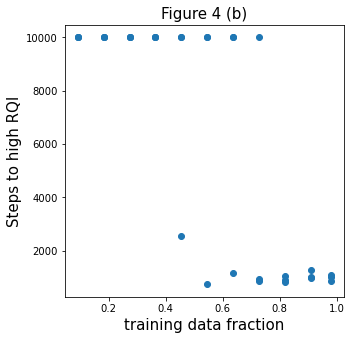

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
fontsize = 15
# Figure 3a
p = 10
all_num = int(p*(p+1)/2)
plt.scatter(np.array(train_nums_)/all_num, rqisteps)
plt.xlabel("training data fraction", fontsize=fontsize)
plt.ylabel("Steps to high RQI", fontsize=fontsize)
print("The points are above the line")

plt.title("Figure 4 (b)", fontsize=fontsize)